# 1. Import and Install Dependencies

In [ ]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_drawing_styles = mp.solutions.drawing_styles

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
# For webcam input:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()

In [7]:
# draw_landmarks(frame, results)

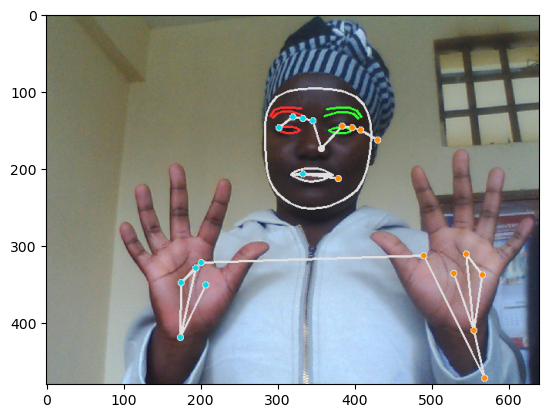

In [9]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
# len(results.face_landmarks.landmark)

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.55811793,  0.36331791, -1.37178886, ...,  0.15977579,
        0.57871985, -0.07013315])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.55811793,  0.36331791, -1.37178886, ...,  0.15977579,
        0.57871985, -0.07013315])

# 4. Setup Folders for Collection

In [19]:
# Function to extract keypoints from results
def extract_keypoints(results):
    # Extract face keypoints
    face_keypoints = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    
    # Extract pose keypoints
    pose_keypoints = np.array([[res.x, res.y, res.z] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*3)

    # Concatenate face and pose keypoints
    keypoints = np.concatenate([face_keypoints, pose_keypoints])
    return keypoints

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('G62-SIGNLANGUAGE') 

# Actions that we try to detect
actions = np.array(['a', 'b', 'c'])

# Thirty videos worth of data
no_sequences = 5

# Videos are going to be 30 frames in length
sequence_length = 5

# Folder start
start_folder = 5

In [20]:
# Create directories if they don't exist
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except FileExistsError:
            pass  # Directory already exists

# 5. Collect Keypoint Values for Training and Testing

In [21]:

# Initialize video capture
cap = cv2.VideoCapture(0)

# Set MediaPipe model
mp_holistic = mp.solutions.holistic

# Main loop for collecting frames for each action and sequence
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                success, image = cap.read()
                if not success:
                    print("Ignoring empty camera frame.")
                    continue

                # Process the image with MediaPipe
                image.flags.writeable = False
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                results = holistic.process(image)
                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                # Display information and draw landmarks
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 250),  # Adjusted y-coordinate to 250
                                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 4, cv2.LINE_AA)  # Increased font scale to 1.5
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 40),  # Adjusted y-coordinate to 40
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)  # Increased font scale to 0.7
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 40),  # Adjusted y-coordinate to 40
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)  # Increased font scale to 0.7

    
                # Extract keypoints and save numpy array
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num) + '.npy')
                np.save(npy_path, keypoints)

                # Show the image
                cv2.imshow('MediaPipe Holistic', image)
                
                # Break loop if 'ESC' key is pressed
                if cv2.waitKey(5) & 0xFF == 27:
                    break

# Release video capture and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

In [22]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# train test split it spit the data into training partition and testing partition
# categorical encoding is better when you convert your data into one hot encoding data

In [24]:
# create the label map, it creates a dictionary with labels like 0, 1, 2 .............
label_map = {label:num for num, label in enumerate(actions)}

In [25]:
label_map

{'a': 0, 'b': 1, 'c': 2}

In [26]:
# amount of data we need to gather for different postures and positions
# of hands (left and right), face,poses and so on which contains all of our data which contain a keypoints in each
# is equal to (468*3)+(33*4)+(21*3)+(21*3) equal to 1662
(468*3)+(33*4)+(21*3)+(21*3)

1662

In [27]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            file_path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
            if os.path.exists(file_path):
                res = np.load(file_path)
                window.append(res)
            else:
                print("File not found:", file_path)
                continue
        sequences.append(window)
        labels.append(label_map[action])


In [28]:
np.array(sequences).shape

(15, 5, 1503)

In [29]:
np.array(labels).shape

(15,)

In [30]:
X = np.array(sequences)

In [31]:
X.shape

(15, 5, 1503)

In [32]:
y = to_categorical(labels).astype(int)

In [33]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [35]:
X_train.shape

(13, 5, 1503)

In [36]:
X_test.shape

(2, 5, 1503)

In [37]:
y_train.shape

(13, 3)

In [38]:
y_test.shape

(2, 3)

# 7. Build and Train LSTM Neural Network

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
# tensor board is used to monitor your training accuracy as you train

In [41]:
model = Sequential() # instantiate the model (sequential api)
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(5, 1503))) # this value 30, 1503 its the X.shape value (it depends and amount of data you have)
# return true is because the next layer its going to use again
model.add(LSTM(128, return_sequences=True, activation='relu'))
# return true is because the next layer its going to use again
model.add(LSTM(64, return_sequences=False, activation='relu'))
# return is false is because the next layer does not need to use the sequence instea is flattening the array to 1Dimension
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
# softmax is for more than one output

# forexample for our three examples 'hello', 'thanks', 'iloveyou'
# based on their positions
# let assume you got a result like this [0.1, 0.8, 0.1]
# meaning that the second word is predicted well which is thanks
# look at here
result_predicted = [0.7, 0.2, 0.1]

In [43]:
# print their actions to see
actions[np.argmax(result_predicted)]

'a'

In [44]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# we use this because we have multiclass classification model

In [45]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])
# the advantage of using (mediapipe/ callbacks) is it data is feed into memory

Epoch 1/100
1/1 [==============================] - 23s 23s/step - loss: 1.0951 - categorical_accuracy: 0.3846
Epoch 2/100
1/1 [==============================] - 0s 67ms/step - loss: 1.0841 - categorical_accuracy: 0.3846
Epoch 3/100
1/1 [==============================] - 0s 71ms/step - loss: 1.0410 - categorical_accuracy: 0.3846
Epoch 4/100
1/1 [==============================] - 0s 80ms/step - loss: 0.9441 - categorical_accuracy: 0.3846
Epoch 5/100
1/1 [==============================] - 0s 80ms/step - loss: 0.8564 - categorical_accuracy: 0.3846
Epoch 6/100
1/1 [==============================] - 0s 79ms/step - loss: 0.8428 - categorical_accuracy: 0.3077
Epoch 7/100
1/1 [==============================] - 0s 80ms/step - loss: 0.8257 - categorical_accuracy: 0.5385
Epoch 8/100
1/1 [==============================] - 0s 72ms/step - loss: 0.7958 - categorical_accuracy: 0.5385
Epoch 9/100
1/1 [==============================] - 0s 71ms/step - loss: 0.7584 - categorical_accuracy: 0.6923
Epoch 10/1

1/1 [==============================] - 0s 67ms/step - loss: 0.0662 - categorical_accuracy: 1.0000
Epoch 75/100
1/1 [==============================] - 0s 72ms/step - loss: 0.0598 - categorical_accuracy: 1.0000
Epoch 76/100
1/1 [==============================] - 0s 89ms/step - loss: 0.0578 - categorical_accuracy: 1.0000
Epoch 77/100
1/1 [==============================] - 0s 66ms/step - loss: 0.0569 - categorical_accuracy: 1.0000
Epoch 78/100
1/1 [==============================] - 0s 83ms/step - loss: 0.0563 - categorical_accuracy: 1.0000
Epoch 79/100
1/1 [==============================] - 0s 80ms/step - loss: 0.0560 - categorical_accuracy: 1.0000
Epoch 80/100
1/1 [==============================] - 0s 61ms/step - loss: 0.0557 - categorical_accuracy: 1.0000
Epoch 81/100
1/1 [==============================] - 0s 72ms/step - loss: 0.0548 - categorical_accuracy: 1.0000
Epoch 82/100
1/1 [==============================] - 0s 62ms/step - loss: 0.0533 - categorical_accuracy: 1.0000
Epoch 83/100
1

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             401408    
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 555971 (2.12 MB)
Trainable params: 555971 

# 8. Make Predictions

In [47]:
res = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [48]:
actions[np.argmax(res[1])]

'a'

In [49]:
actions[np.argmax(y_test[1])]

'b'

# 9. Save Weights

In [88]:
model.save('action.h5')

In [90]:
# del model

In [92]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [93]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [94]:
ypredicted = model.predict(X_test)

1/1 [==============================] - 0s 31ms/step


In [95]:
ytrue = np.argmax(y_test, axis=1).tolist()
ypredicted = np.argmax(ypredicted, axis=1).tolist()

In [96]:
multilabel_confusion_matrix(ytrue, ypredicted)

array([[[1, 0],
        [1, 0]],

       [[1, 1],
        [0, 0]],

       [[1, 0],
        [0, 1]]], dtype=int64)

In [97]:
accuracy_score(ytrue, ypredicted)

0.5

# 11. Test in Real Time

In [98]:
from scipy import stats

In [69]:
# colors = [(245,117,16), (117,245,16), (16,117,245)]
# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
#         cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
#     return output_frame

In [71]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

In [100]:
# new input variables for real time 
sequence = []
sentence = []
threshold = 0.4

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic( min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            
            print("Ignoring empty camera frame.")
              # If loading a video, use 'break' instead of 'continue'.
            continue

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = holistic.process(image)

        # Draw landmark annotation on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks( image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, landmark_drawing_spec=None, connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

        # prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0, keypoints)
        sequence = sequence[:30]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        # Visualization logic
        if res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        cv2.rectangle(image, (0,0), (640,40),(245,117,16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

        # Flip the image horizontally for a selfie-view display.
        cv2.imshow('MediaPipe Holistic', image)
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [86]:
res[np.argmax(res)] > threshold

True

In [87]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 33ms/step


array([[0.00195379, 0.9936126 , 0.0044336 ]], dtype=float32)